# **Lending Club Case Study - upGrad**

## Problem Statement:

Financial services firm Lending Club provides loans to applicants. Customers who do not pay back the loan cause significant loss to the business. The core task is to identify important factors which leads to **default** of customers. The company will use these factors to for it's portfolio and risk assessment.

## Data

We have been provided

1.   Data File(loan.csv): Containing loan data for all loans issued through the time period 2007 to 2011. This contains data about both default and non-default customers. It also contains data regarding current customers who are still under the process of repaying the loan
2.   Data Dictionary: Describing the meaning of these variables



## Initializing python libraries for Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Data File Loading and Initial Data Understanding





In [2]:
loan_df=pd.read_csv("/loan.csv")

<ipython-input-2-66fa2f191bf3>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv("/loan.csv")


In [3]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning

### Generic function to get list of columns which have missing values above given threshold

In [8]:
def columns_with_missing_values_above_threshold(df, threshold=95):
    """
    Identifies columns in the DataFrame where the percentage of missing values is above a specified threshold.

    Parameters:
    df (DataFrame): The DataFrame to analyze.
    threshold (float): The percentage threshold of missing values to filter the columns.

    Returns:
    Series: A pandas Series where the index is the column names and the values are the percentages of missing values.
    """
    # Calculate the percentage of missing values per column
    missing_percentage = 100 * df.isnull().mean()

    # Filter columns where the percentage of missing values is greater than the threshold
    columns_above_threshold = missing_percentage[missing_percentage > threshold]

    return columns_above_threshold


In [9]:

# Invoking function to remove columns which have more than 95% as null values. This high percentage of null values would not contribute much to our analysis.
loan_df=loan_df.drop(columns=columns_with_missing_values_above_threshold(loan_df, 95).index)


In [10]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### Generic function to get columns which have only one value

In [11]:
def find_single_value_columns(df):
    """
    Identifies columns in the DataFrame that contain only a single unique value.

    A column with only one unique value does not provide useful information for analysis,
    as it is constant for all rows. Such columns are often candidates for removal
    from the dataset before further analysis.

    Parameters:
    df (DataFrame): The DataFrame to inspect.

    Returns:
    Series: A pandas Series where the index is the column names that have only one unique value.
    """
    # Use a dictionary comprehension to find columns with a single unique value
    single_value_columns = pd.Series({col: df[col].unique()[0] for col in df.columns if df[col].nunique() == 1})

    # Return the Series of column names with only one unique value
    return single_value_columns

# Example usage:
# single_value_cols = find_single_value_columns(loan_df)
# print(f'Columns with only one unique value: {single_value_cols}')
# Now you can drop these columns from the DataFrame if needed
# loan_df = loan_df.drop(columns=single_value_cols.index)


In [12]:
# Invoking function to remove columns which have single values as it would not aid our analysis
loan_df = loan_df.drop(columns=find_single_value_columns(loan_df).index)

In [13]:
#Outlier Removals: Removing features which has high percentage of zero i.e. zeros greater than 95% as they cause a lot of skews in our analysis
percent_zeros = 100 * (loan_df == 0).mean()
loan_df= loan_df.drop(columns=percent_zeros[percent_zeros > 95].index)

### Removing redundant, text based and features which does not aid in analyzing default factors

In [14]:

#Keeping only one primary key column and removing id amd url
remove_redundant_unique = ['id','url']
loan_df=loan_df.drop(columns=remove_redundant_unique)

# Removing text based columns which is not relevant to discussion
remove_text_columns = ['emp_title','desc','title','zip_code']
loan_df= loan_df.drop(columns=remove_text_columns )

# Removing fees and non-analytic columns whic are not relevant to analysis but more for transactional processing
remove_transactional_columns = ['funded_amnt','installment','total_pymnt_inv','total_rec_late_fee']
loan_df= loan_df.drop(columns=remove_transactional_columns)



## Data Transformation : Changing data to correct data types

In [15]:
# Convert the 'issue_d' column to datetime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

# Since the data is from 2007 to 2011, ensure that the century is correct
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: x.replace(year=x.year-100) if x.year > 2011 else x)

# Extract the year from the datetime object
loan_df['issue_year'] = loan_df['issue_d'].dt.year

# Now the 'issue_year' column will contain only the year part of the 'issue_d' entries


In [16]:
# Term column contain values like '36 months'. Removing the months from it so that value is all integer and can be used for analysis
loan_df['term'] = loan_df['term'].str.replace(' months', '').astype(int)

# Now loan_df['term'] will contain integer values like 36 or 60


In [17]:
# Removing the % values from int_rate and converting to float

loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '').astype(float)


In [18]:
# Convert the 'earliest_cr_line' column to datetime
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')

# Function to correct the year
def correct_year(x):
    if x.year > 2011:
        year = x.year - 100
    else:
        year = x.year
    return x.replace(year=year)

# Apply the correction to the entire column
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(correct_year)

# Extract the year from the datetime object
loan_df['earliest_cr_year'] = loan_df['earliest_cr_line'].dt.year

# Now 'earliest_cr_year' will contain the year part of the 'earliest_cr_line' entries


In [19]:
loan_df.dtypes

member_id                           int64
loan_amnt                           int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                            int64
pub_rec                             int64
revol_bal                         

# Data Analysis

In [21]:
#  Checking the loan status of applicants
for i in loan_df['loan_status'].unique():
    print("Percentage of people who have ",i,"are:",100*loan_df[loan_df['loan_status']==i].shape[0]/loan_df.shape[0])

Percentage of people who have  Fully Paid are: 82.96195583755068
Percentage of people who have  Charged Off are: 14.167736737417227
Percentage of people who have  Current are: 2.8703074250321023


In [22]:
# We will also creata a new column using loan status in to numerical column for further analysis
loan_df['loan_status_num']=np.where(loan_df['loan_status']=='Fully Paid',0,1)



# Univariate Analysis

### Quick Observations based on Univariate analysis

Most of the loan term is 36 months.

Interest rates usually fall between 10 to 20%

Nearly two third of the loans fall in A,B,C grade

Top 2 category of applicants either have more than 10 years or work experience or less than 1 year experience

California, New York and Floridate provide most of the applicants

### Generic function to plot columns to graphs for single variable analysis

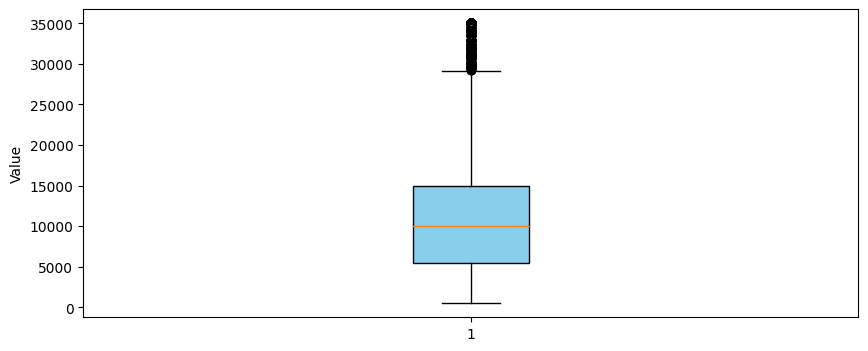

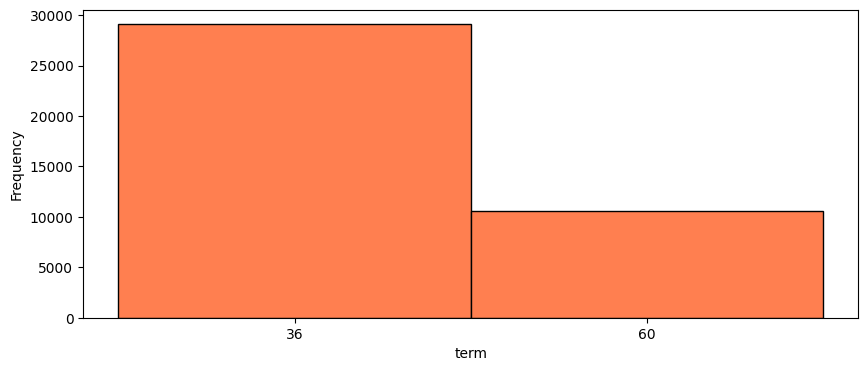

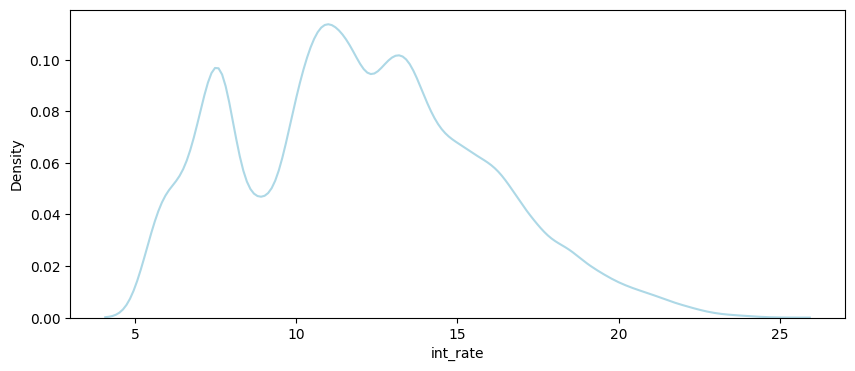

<Figure size 1000x400 with 0 Axes>

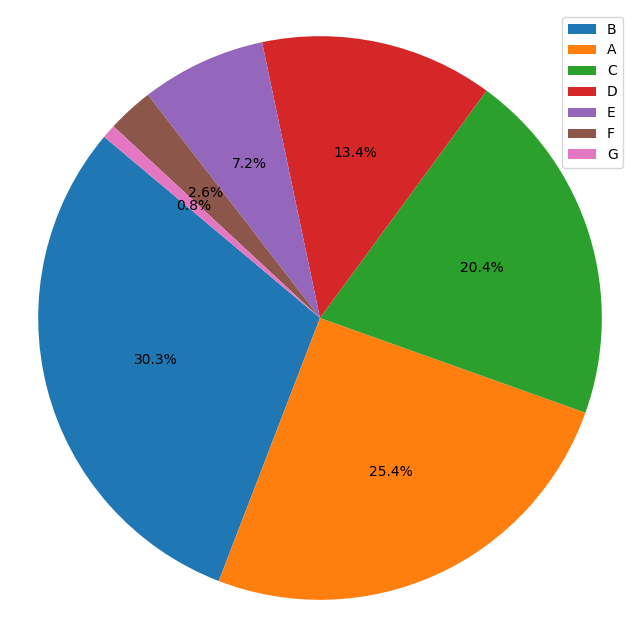

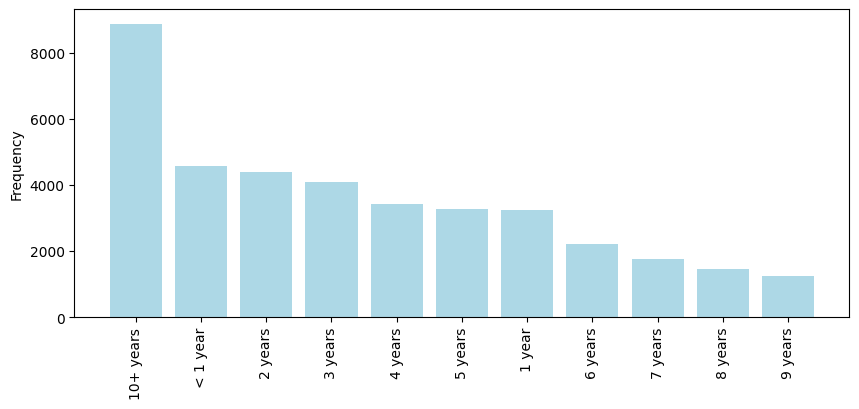

<Figure size 1000x400 with 0 Axes>

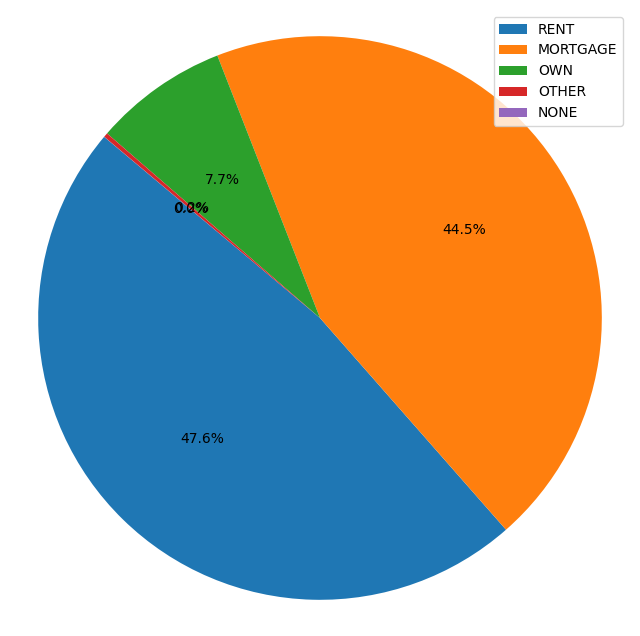

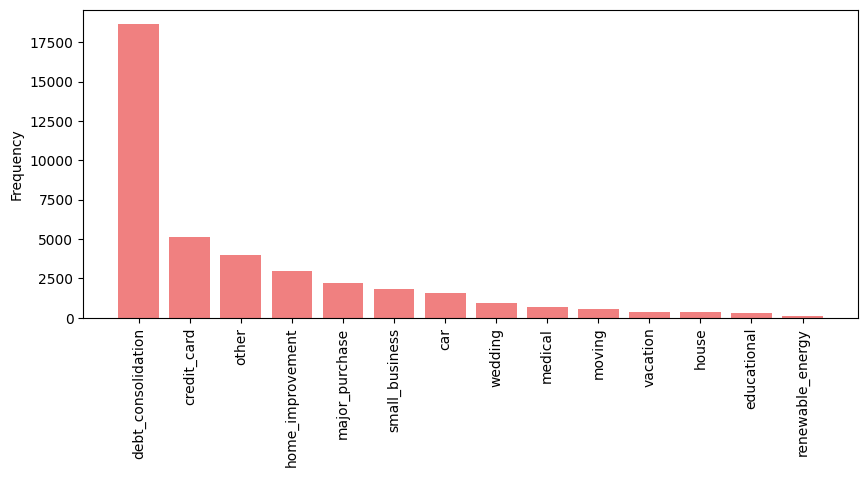

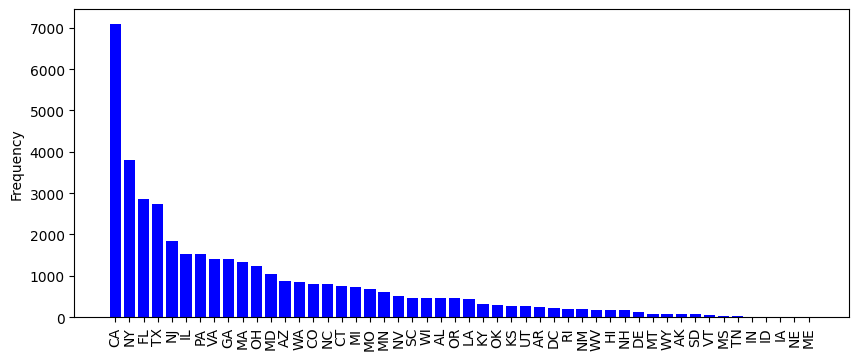

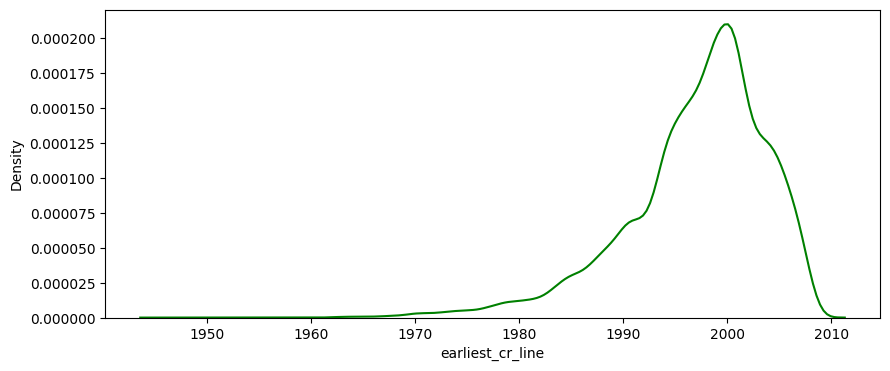

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_data(df, column_name, plot_type, color):
    """
    This function visualizes the data in a column of a pandas DataFrame using different types of plots.
    Each plot type is suited to the nature of the data (categorical, continuous, or time-series).

    Parameters:
    df (DataFrame): The DataFrame containing the data to plot.
    column_name (str): The name of the column to visualize.
    plot_type (str): The type of plot to create. Options include 'histogram', 'boxplot', 'bar_chart', 'pie_chart', 'kde', and 'line_chart'.
    color (str): The color to use for the plot.
    """
    plt.figure(figsize=(10, 4))

    if plot_type == 'histogram':
    # Drop NA values
      data_clean = df[column_name].dropna()

    # Determine the number of unique values to set the number of bins
      unique_values = sorted(data_clean.unique())
      n_bins = len(unique_values)

    # Calculate the width of each bin by finding the minimum difference between unique values
      if n_bins > 1:
        bin_width = min(np.diff(unique_values)) / 2
      else:
        # In case there is only one unique value, set a default bin width
        bin_width = 0.5

    # Define bin edges
      bins = np.arange(min(unique_values) - bin_width, max(unique_values) + bin_width * 2, bin_width * 2)
    # Plot the histogram
      plt.hist(data_clean, bins=bins, edgecolor='black', color=color, align='mid')

    # Set x-ticks to be the unique values, ensuring they are centered
      plt.xticks(unique_values)
      plt.ylabel('Frequency')
      plt.xlabel(column_name)
      #plt.title(f'Distribution of {column_name}')
      plt.show()

    elif plot_type == 'boxplot':
        plt.boxplot(df[column_name].dropna(), patch_artist=True, boxprops=dict(facecolor=color))
        plt.ylabel('Value')

    elif plot_type == 'bar_chart':
        counts = df[column_name].value_counts()
        plt.bar(counts.index, counts.values, color=color)
        plt.xticks(rotation=90)
        plt.ylabel('Frequency')

    elif plot_type == 'pie_chart':
        counts = df[column_name].value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(counts, autopct='%1.1f%%', startangle=140)
        plt.legend(counts.index, loc="best")  # You can adjust the location as needed

        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    elif plot_type == 'kde':
        sns.kdeplot(df[column_name].dropna(), color=color)
        plt.ylabel('Density')

    elif plot_type == 'line_chart':
        # Ensure the data is sorted or sequential before plotting
        sorted_data = df[column_name].dropna().sort_values().reset_index(drop=True)
        plt.plot(sorted_data, color=color)
        plt.ylabel('Value')

# List of columns and their appropriate plot types
columns_plot_types = {
    'loan_amnt': ('boxplot', 'skyblue'),
    'term': ('histogram', 'coral'),
    'int_rate': ('kde', 'lightblue'),
    'grade': ('pie_chart', 'lightgreen'),
    'emp_length': ('bar_chart', 'lightblue'),
    'home_ownership': ('pie_chart', 'plum'),
    'purpose': ('bar_chart', 'lightcoral'),
    'addr_state' : ('bar_chart', 'blue'),
    'earliest_cr_line' : ('kde', 'green')
}

# Loop through the columns and plot the data with colors
for column, (plot_type, color) in columns_plot_types.items():
    plot_column_data(loan_df, column, plot_type, color)


In [36]:
# Summary for numerical columns
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc']
numerical_summary = loan_df[numerical_cols].describe()

# Frequency counts for categorical columns
categorical_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'purpose', 'addr_state']
categorical_summary = {col: loan_df[col].value_counts() for col in categorical_cols}

# Date range for 'earliest_cr_line'
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
earliest_cr_line_summary = {
    'earliest': loan_df['earliest_cr_line'].min(),
    'latest': loan_df['earliest_cr_line'].max()
}

# Displaying the summaries
print("Numerical Summary:")
print(numerical_summary)

print("\nCategorical Summary:")
for col, summary in categorical_summary.items():
    print(f"\n{col} Count:")
    print(summary)

print("\nEarliest Credit Line Summary:")
print(earliest_cr_line_summary)


Numerical Summary:
          loan_amnt      int_rate    annual_inc
count  39717.000000  39717.000000  3.971700e+04
mean   11219.443815     12.021177  6.896893e+04
std     7456.670694      3.724825  6.379377e+04
min      500.000000      5.420000  4.000000e+03
25%     5500.000000      9.250000  4.040400e+04
50%    10000.000000     11.860000  5.900000e+04
75%    15000.000000     14.590000  8.230000e+04
max    35000.000000     24.590000  6.000000e+06

Categorical Summary:

term Count:
36    29096
60    10621
Name: term, dtype: int64

grade Count:
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

emp_length Count:
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

home_ownership Count:
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE 

# Segmented Uni Variate Analysis


### Purpose segmented by loan status

> Indented block



From below observations, loans with purpose of small business have higher chance of default than other purposes

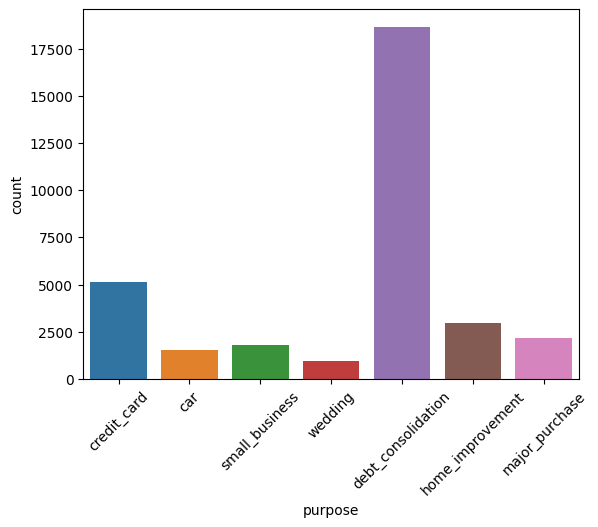

In [37]:
purpose_columns=['debt_consolidation','credit_card','home_improvement','major_purchase','small_business','car','wedding']
loan_df_purpose=loan_df[loan_df['purpose'].isin(purpose_columns)]
# Loans by purpose
countplot=sns.countplot(x=loan_df_purpose['purpose'])
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45)

plt.show()



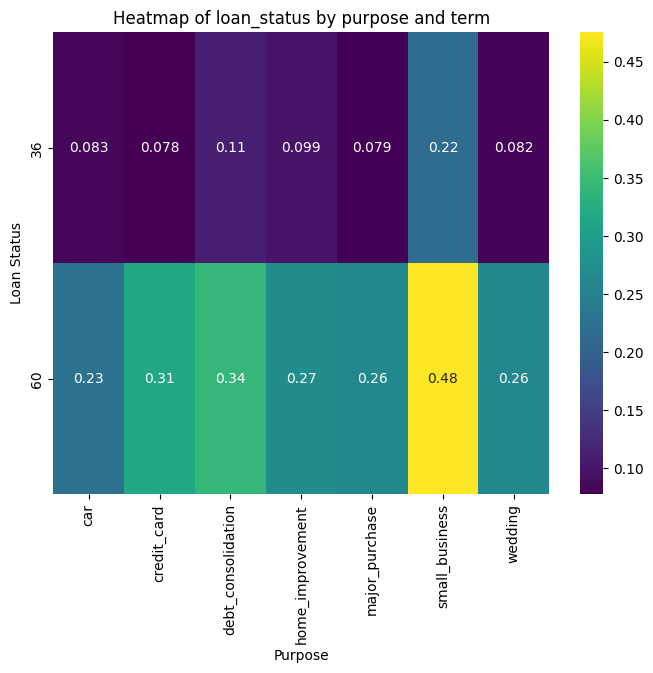

In [38]:

# Pivot the data for the heatmap
heatmap_data = loan_df_purpose.pivot_table(index='term', columns='purpose', values='loan_status_num', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)

# Add labels and a title
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.title(f'Heatmap of loan_status by purpose and term')

# Show the plot
plt.show()

## Grade segmented by loan status



Based on observations below, loans with lower grades like grades e,f,g are more likely to be changed off than higher grades like grades a,b and c

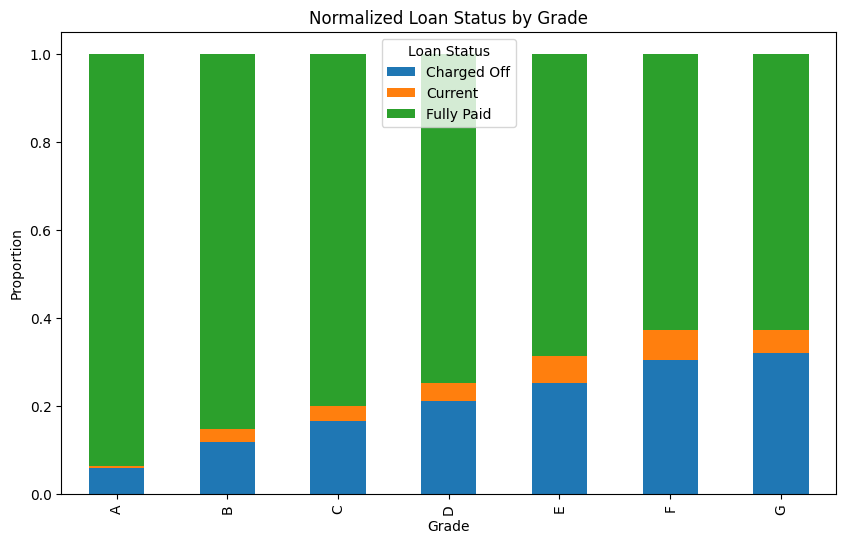

In [39]:
# Create a crosstab of the grade and loan status columns
crosstab = pd.crosstab(loan_df['grade'], loan_df['loan_status'], normalize='index')

# Plot the crosstab as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')
plt.show()



## Interest rate segmented by loan status

A new column called interest rate bin is created to classify the interest rate into buckets of 5%.

Loans with higher interest rate are more likely to be chared off than loans with lower interest rate

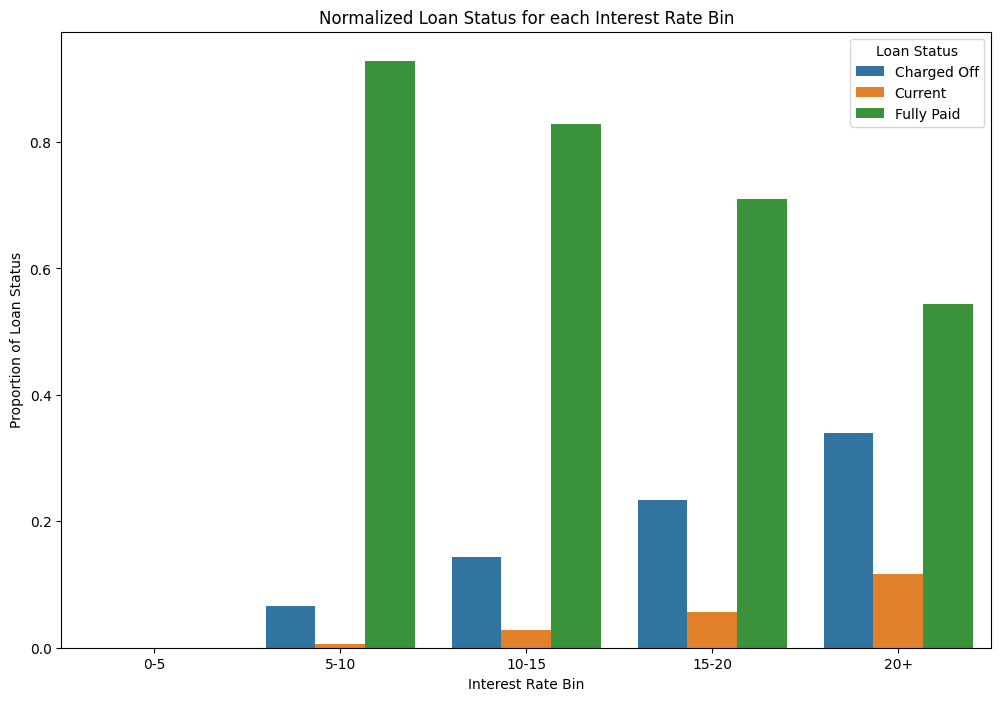

In [40]:

# 1. Create the int_rate_bin column based on the specified categories
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], bins=bins, labels=labels, right=False)



# First, create a normalized crosstab
crosstab_normalized = pd.crosstab(loan_df['int_rate_bin'], loan_df['loan_status'], normalize='index')

# Convert the crosstab to a DataFrame that seaborn can use for grouped bar chart
crosstab_normalized = crosstab_normalized.reset_index()
crosstab_melted = crosstab_normalized.melt(id_vars='int_rate_bin')

# Now plot using seaborn's barplot, which automatically groups
plt.figure(figsize=(12, 8))
sns.barplot(x='int_rate_bin', y='value', hue='loan_status', data=crosstab_melted)
plt.title('Normalized Loan Status for each Interest Rate Bin')
plt.xlabel('Interest Rate Bin')
plt.ylabel('Proportion of Loan Status')
plt.legend(title='Loan Status')
plt.show()




## Term segmented by loan status

Loans with 60 months terms are twice likely to chaged off than 36 months term

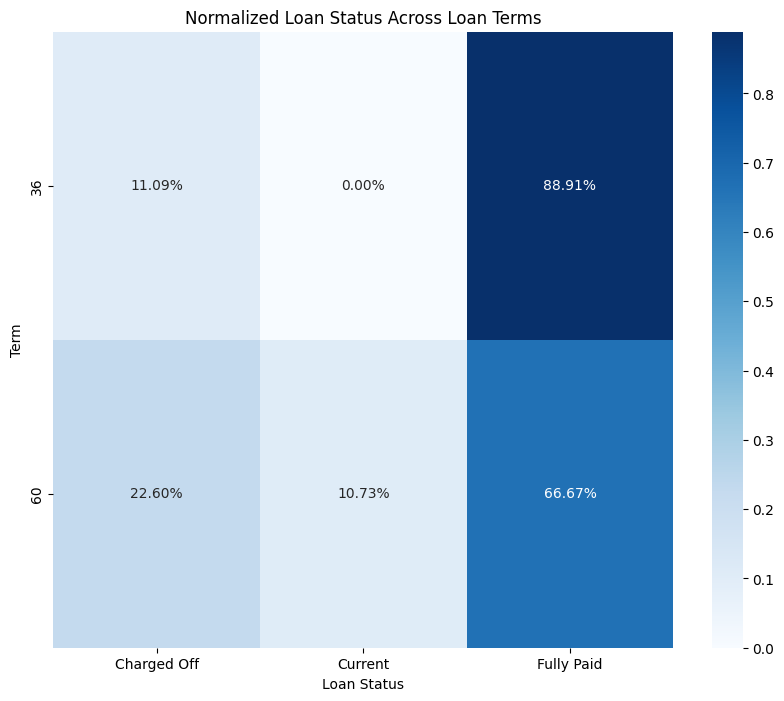

In [41]:
# Normalized crosstab of term and loan_status
crosstab_normalized = pd.crosstab(loan_df['term'], loan_df['loan_status'], normalize='index')

# Create a heat map from the crosstab data
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Normalized Loan Status Across Loan Terms')
plt.xlabel('Loan Status')
plt.ylabel('Term')
plt.show()


## Annual income segmented by loan status


New column called annual income bin is calculated for every $10,000 of annual income

As expected, customers with lower income are likely to default more than higher income customers

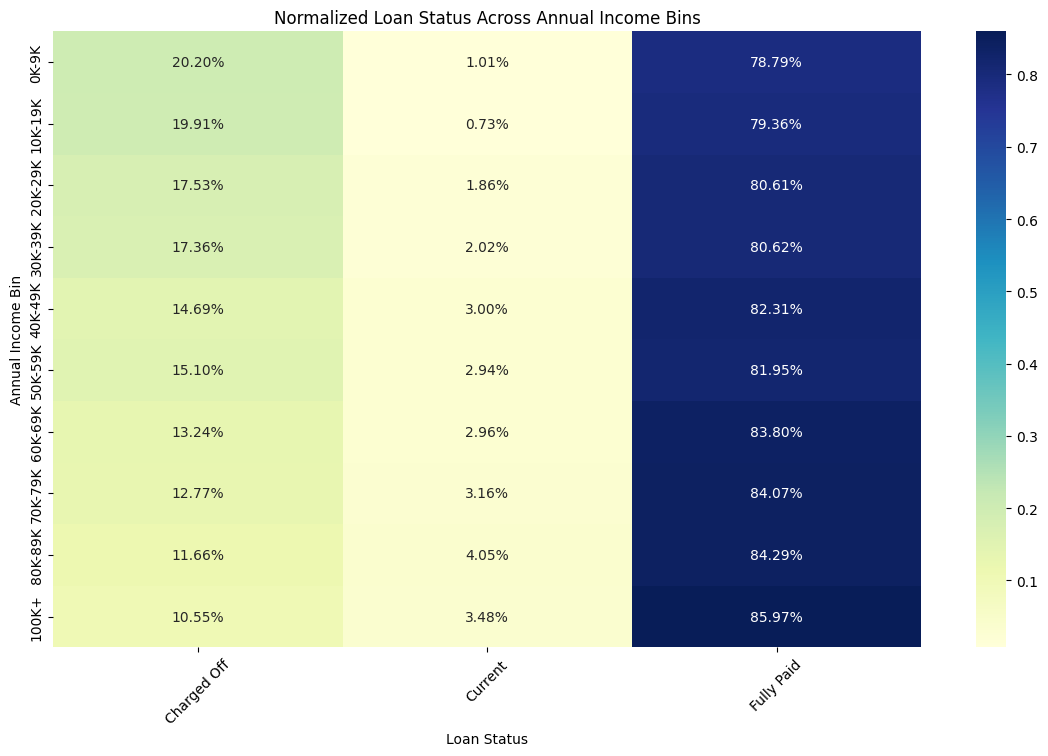

In [42]:
# Define the bins and labels for the annual_inc column
bins = list(range(0, 100000, 10000)) + [float('inf')]
labels = [f"{int(b/1000)}K-{int((b+10000)/1000)-1}K" for b in bins[:-2]] + ['100K+']

# Create the annual_inc_bin column
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=bins, labels=labels, include_lowest=True)

# Create a normalized crosstab of annual_inc_bin and loan_status
crosstab_normalized = pd.crosstab(loan_df['annual_inc_bin'], loan_df['loan_status'], normalize='index')

# Create a heat map from the crosstab data
plt.figure(figsize=(14, 8))
sns.heatmap(crosstab_normalized, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Normalized Loan Status Across Annual Income Bins')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income Bin')
plt.xticks(rotation=45)
plt.show()


# Bivariate Analysis

## Relationship between grade and default percent

Higher rate of default exists at lower grades like grade E, F, G

In [43]:
#Here we will analysis based on two column and try to derive some insights. We will create function so that it can be applied to all the variables
def bar_plot(x,y,data,x_label,y_label):
    plt.figure(figsize=(16, 6))
    sns.barplot(x=loan_df[x],y=loan_df[y],data=data,order=sorted(loan_df[x].unique()))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


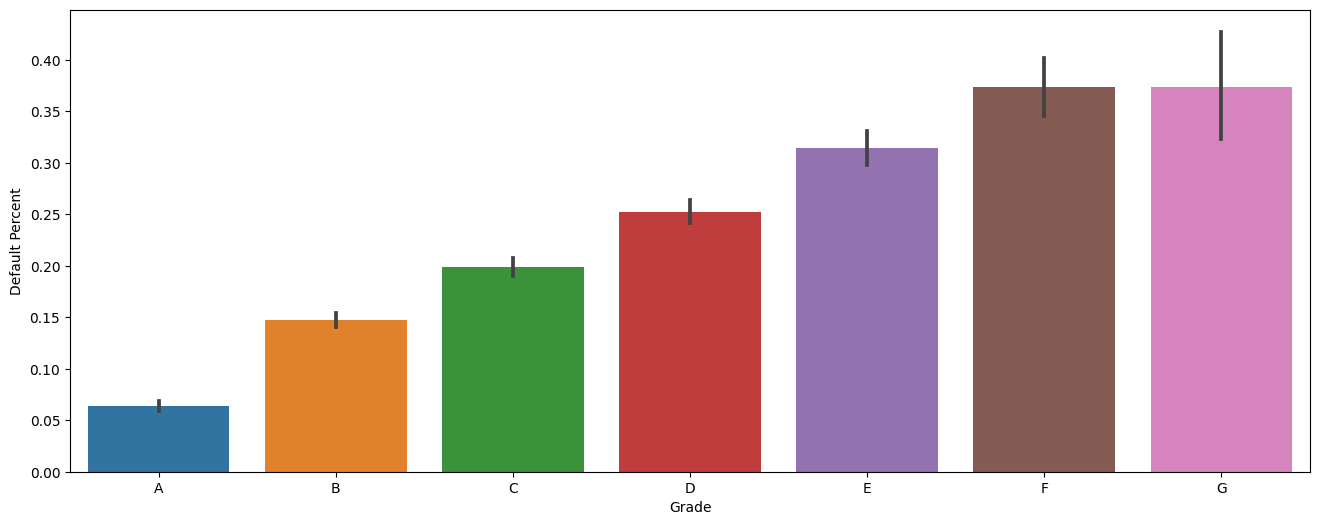

In [44]:
bar_plot('grade','loan_status_num',loan_df,'Grade','Default Percent')

## Relationship between term and default percent

60 month term has a significantly higher default rates than 36 month term

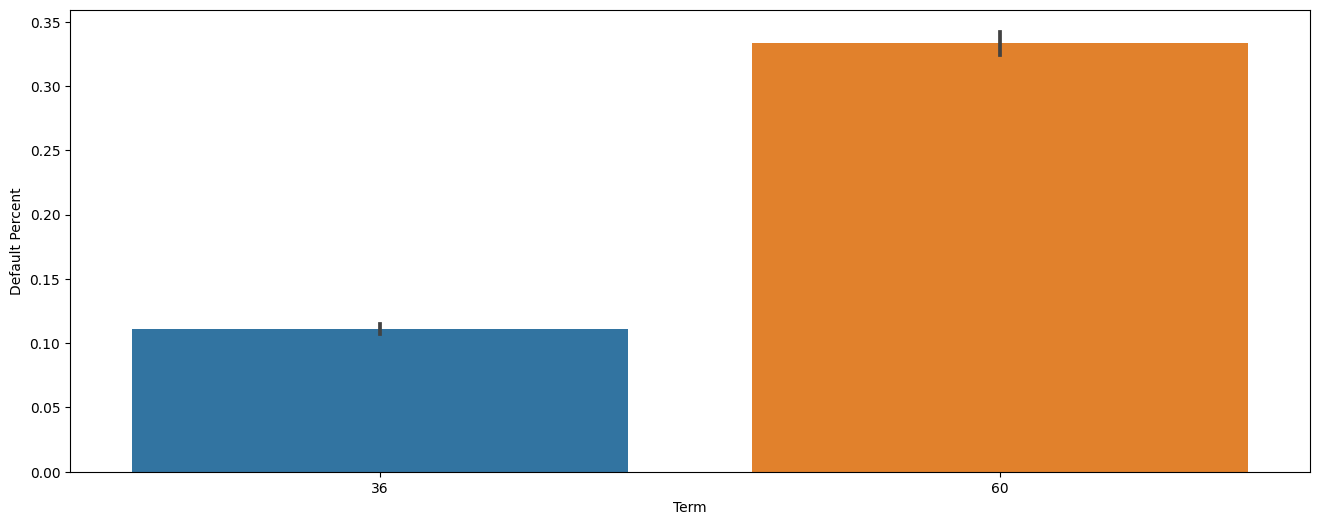

In [45]:
bar_plot('term','loan_status_num',loan_df,"Term","Default Percent")



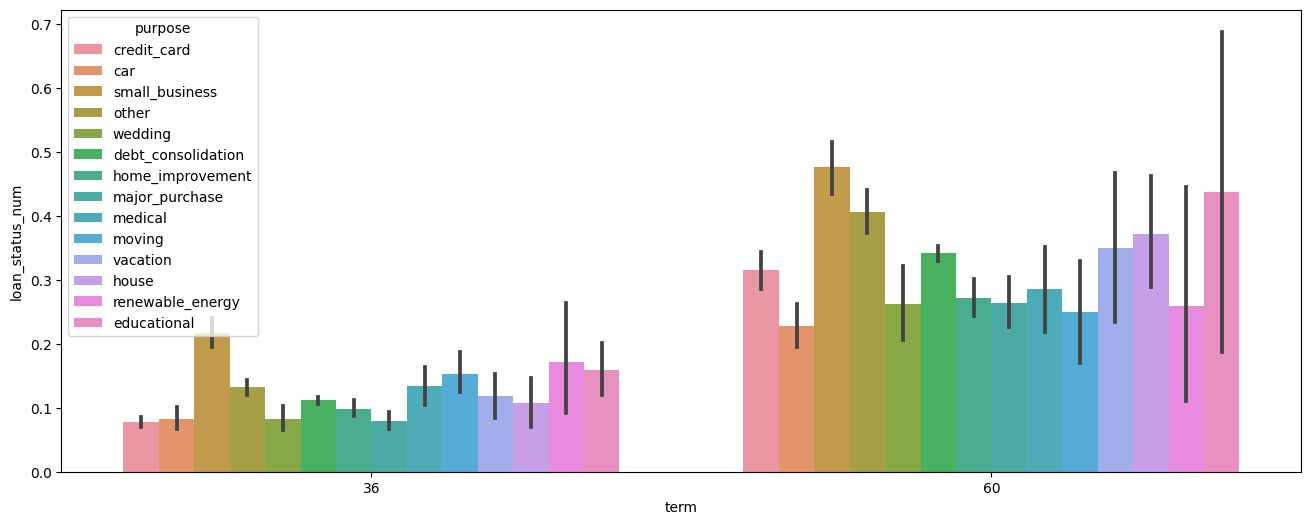

In [46]:
plt.figure(figsize=[16, 6])
sns.barplot(x='term', y="loan_status_num", hue='purpose', data=loan_df,estimator='mean')
plt.show()


## Relationship between addr_state and default percent

States of Nebraska, Nevada and South Dakota have significantly higher default percent than other states


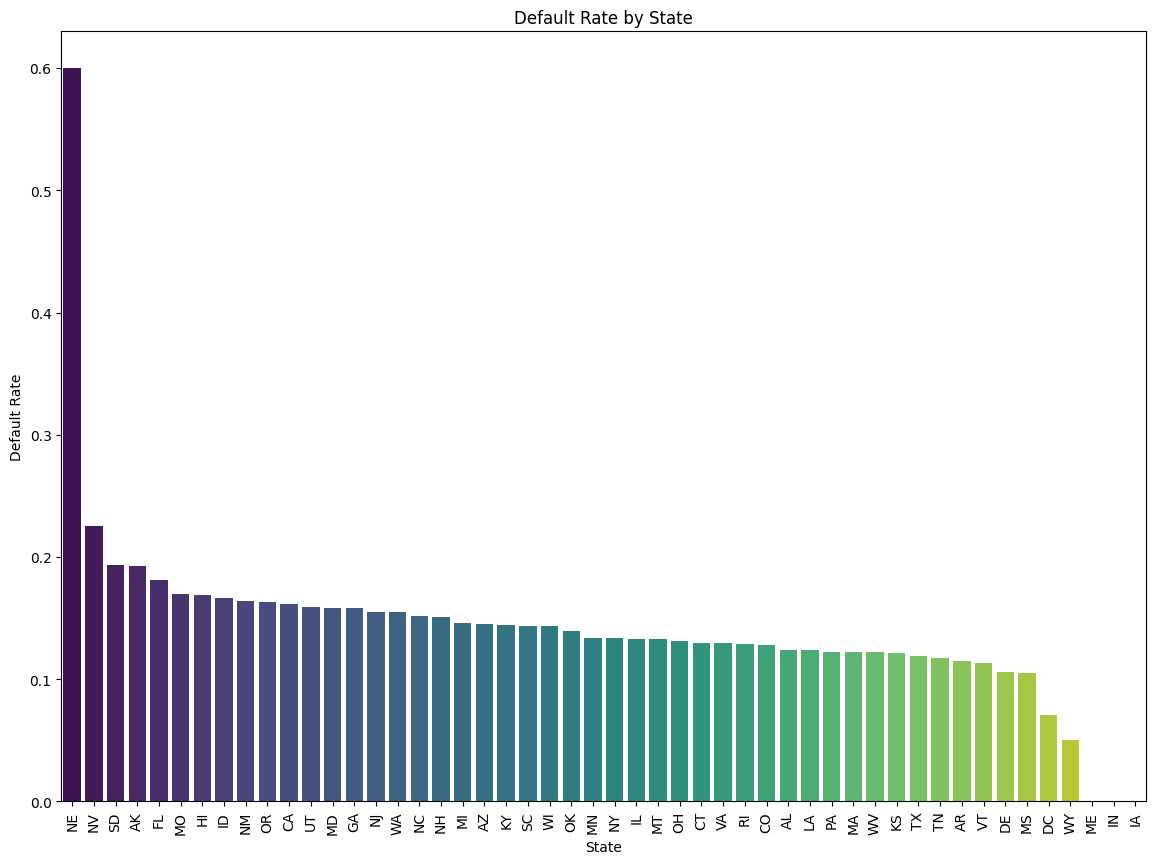

In [47]:

# First, create a subset of the data with only 'Charged Off' and 'Fully Paid'
loan_df_filtered = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Create a crosstab of addr_state and loan_status
crosstab = pd.crosstab(loan_df_filtered['addr_state'], loan_df_filtered['loan_status'])

# Normalize the counts to get the proportion of defaults by state
crosstab['Charged Off'] = crosstab['Charged Off'] / crosstab.sum(axis=1)

# Reset index to use 'addr_state' as a column for plotting
crosstab = crosstab.reset_index()

# Sort the DataFrame based on 'Default Rate' to make the chart more informative
crosstab = crosstab.sort_values('Charged Off', ascending=False)

# Plot a clustered bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x='addr_state', y='Charged Off', data=crosstab, palette='viridis')
plt.title('Default Rate by State')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.xlabel('State')
plt.ylabel('Default Rate')
plt.show()


## Relationship between home ownership and default percent

No significant relationship can be inferred between home ownership and default percentage

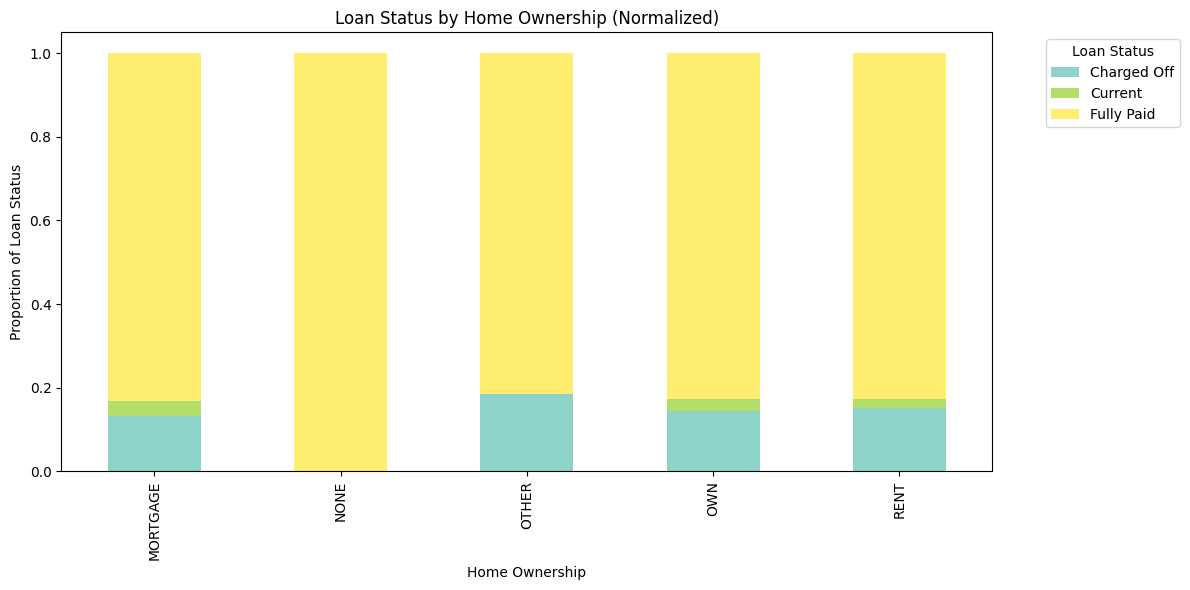

In [48]:
# Create a crosstab of home_ownership and loan_status
crosstab = pd.crosstab(loan_df['home_ownership'], loan_df['loan_status'])

# Normalize the crosstab to get proportions
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Loan Status by Home Ownership (Normalized)')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion of Loan Status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


## Relationship between employment length and default percent

Customers with more than 10 years of experience seem to have higher default percent than other employment length categores

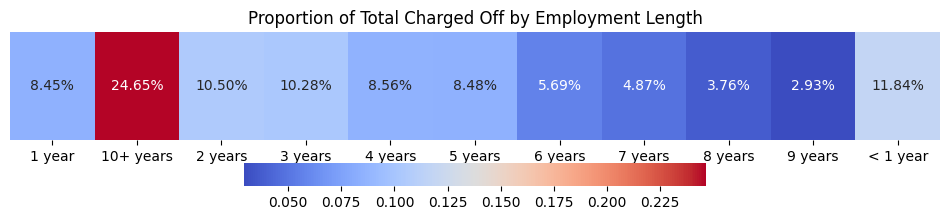

In [49]:
# Create a crosstab of emp_length and loan_status
crosstab_total = pd.crosstab(loan_df['emp_length'], loan_df['loan_status'])

# Get the total number of 'Charged Off' for each employment length
charged_off_counts = crosstab_total['Charged Off']

# Normalize the counts by the total sum of 'Charged Off'
charged_off_normalized = charged_off_counts / charged_off_counts.sum()

# Convert the normalized series to a DataFrame for the heatmap
charged_off_normalized_df = charged_off_normalized.to_frame().T

# Plot the heatmap using seaborn
plt.figure(figsize=(12, 2))  # Adjust the size to fit the single row heatmap
sns.heatmap(charged_off_normalized_df, annot=True, fmt='.2%', cmap='coolwarm', cbar_kws={'orientation': 'horizontal'})
plt.title('Proportion of Total Charged Off by Employment Length')
plt.xlabel('Employment Length')
plt.yticks([])  # Hide the y-axis labels as they are not informative in this case
plt.show()


## Relationship between earliest credit line and default percentage

No significant relationship can be established between earliest credit line and charged off rates. This is not a significant variables

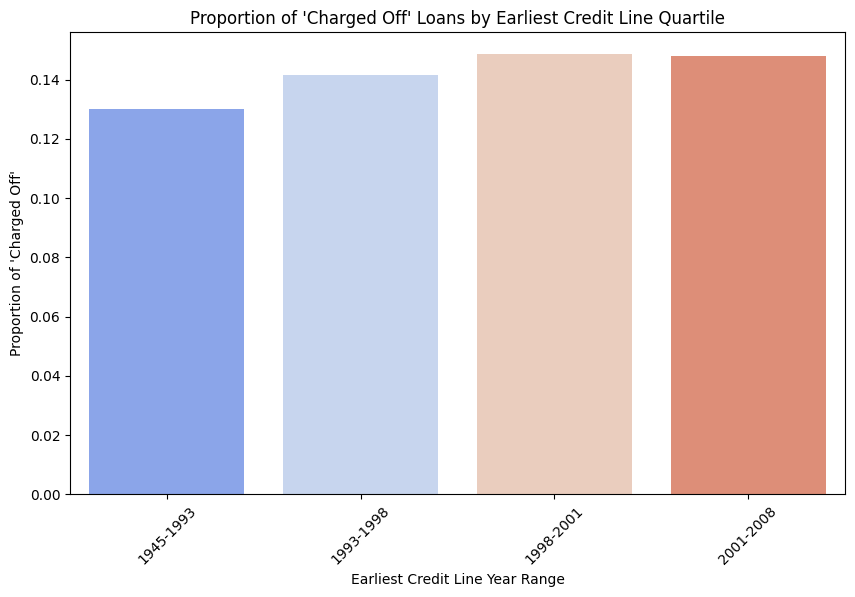

In [50]:
# Extract year from 'earliest_cr_line'
loan_df['earliest_cr_year'] = loan_df['earliest_cr_line'].dt.year

# Categorize into quartiles
loan_df['earliest_cr_quartile'] = pd.qcut(loan_df['earliest_cr_year'], 4)

# Calculate the proportion of 'Charged Off' loans within each quartile
charged_off_rates = loan_df[loan_df['loan_status'] == 'Charged Off'].groupby('earliest_cr_quartile').size() / loan_df.groupby('earliest_cr_quartile').size()

# Reset index to turn the index into columns and work with it as a DataFrame
charged_off_rates = charged_off_rates.reset_index(name='charged_off_rate')

# Create labels for the x-axis based on the quartile ranges
charged_off_rates['quartile_label'] = charged_off_rates['earliest_cr_quartile'].apply(lambda x: f"{int(x.left)}-{int(x.right)}")

# Create a bar plot to visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='quartile_label', y='charged_off_rate', data=charged_off_rates, palette='coolwarm')
plt.title("Proportion of 'Charged Off' Loans by Earliest Credit Line Quartile")
plt.xlabel('Earliest Credit Line Year Range')
plt.ylabel("Proportion of 'Charged Off'")
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()




## Relationship between loan amount and default rate

Based on the plot below, higher the loan amount there is a slight increase in the charged off rate

In [51]:
loan_df['loan_amnt_bin'] = pd.qcut(loan_df['loan_amnt'], q=4, labels=['Low', 'Medium', 'High', 'Very high'])

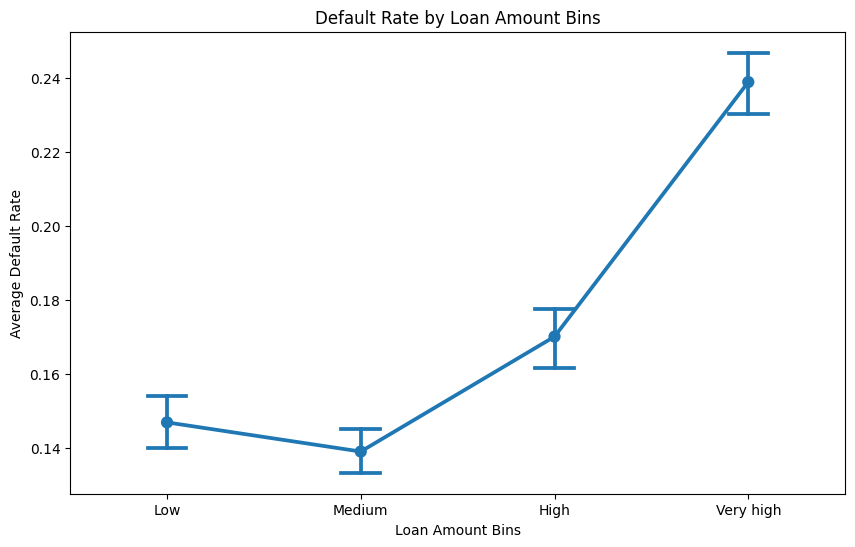

In [52]:
# Assuming 'loan_amnt_bin' is already created and 'loan_status_num' is a binary column in the DataFrame
plt.figure(figsize=(10, 6))
sns.pointplot(x='loan_amnt_bin', y='loan_status_num', data=loan_df, capsize=.2)
plt.title('Default Rate by Loan Amount Bins')
plt.xlabel('Loan Amount Bins')
plt.ylabel('Average Default Rate')
plt.show()


## Relationship between year of loan and default percent

The default rate has had a gradual decrease between years 2007 to 2010 but the rate has increased in year 2011. There needs to be further data to understand the impact of increase in rate in year 2011. But the 60 month term introduced in year 2010 could be a cause for this

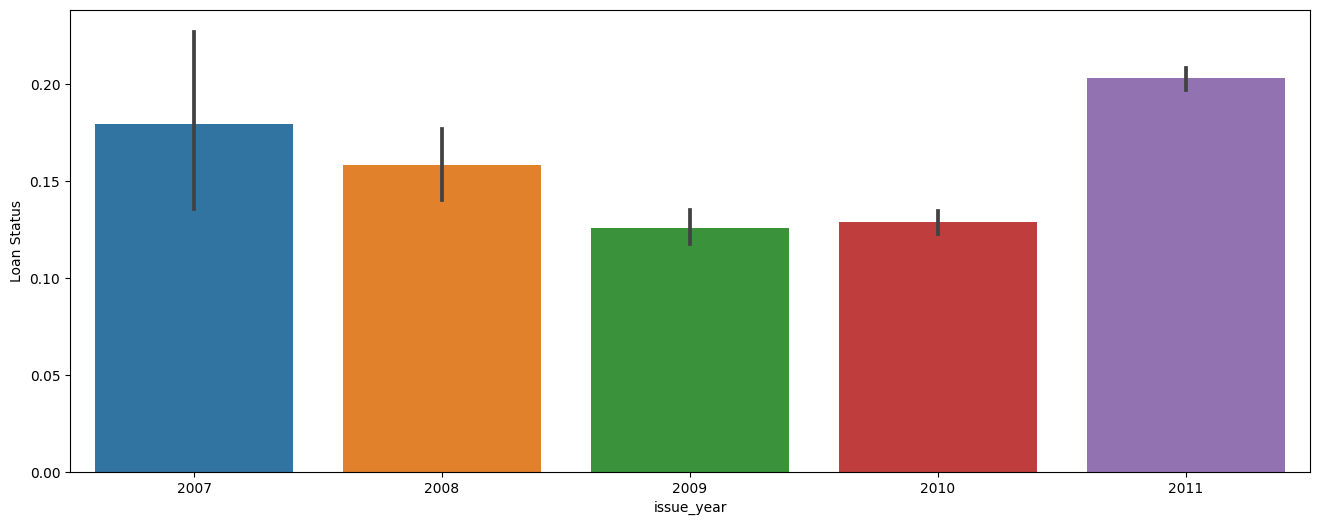

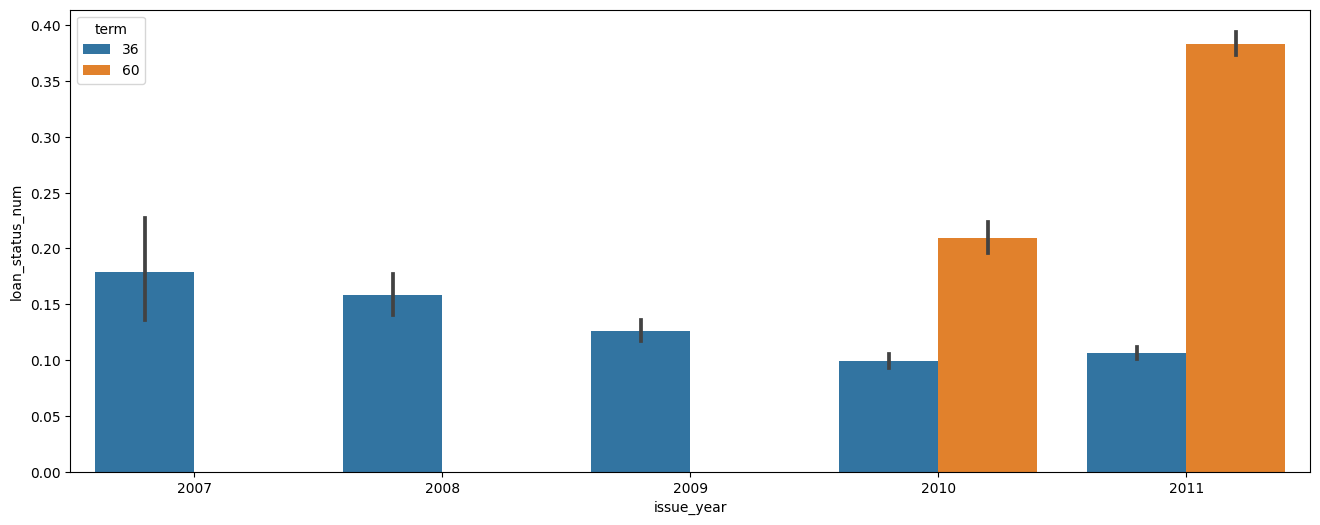

In [53]:
bar_plot('issue_year','loan_status_num',loan_df,'issue_year','Loan Status')

plt.figure(figsize=[16, 6])
sns.barplot(x='issue_year', y="loan_status_num", hue='term', data=loan_df,estimator='mean')
plt.show()


## Relationship between loan amount and loan status

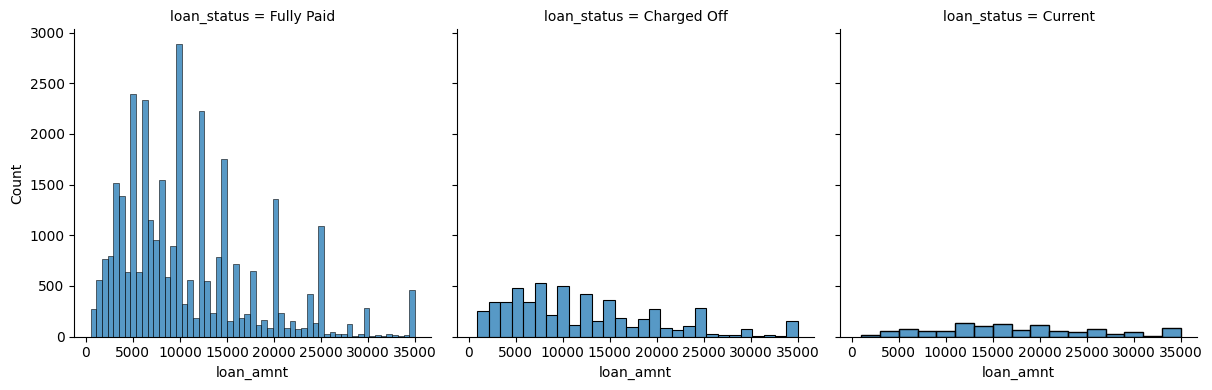

In [54]:
g = sns.FacetGrid(loan_df, col='loan_status', col_wrap=4, height=4)
g.map(sns.histplot, 'loan_amnt')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

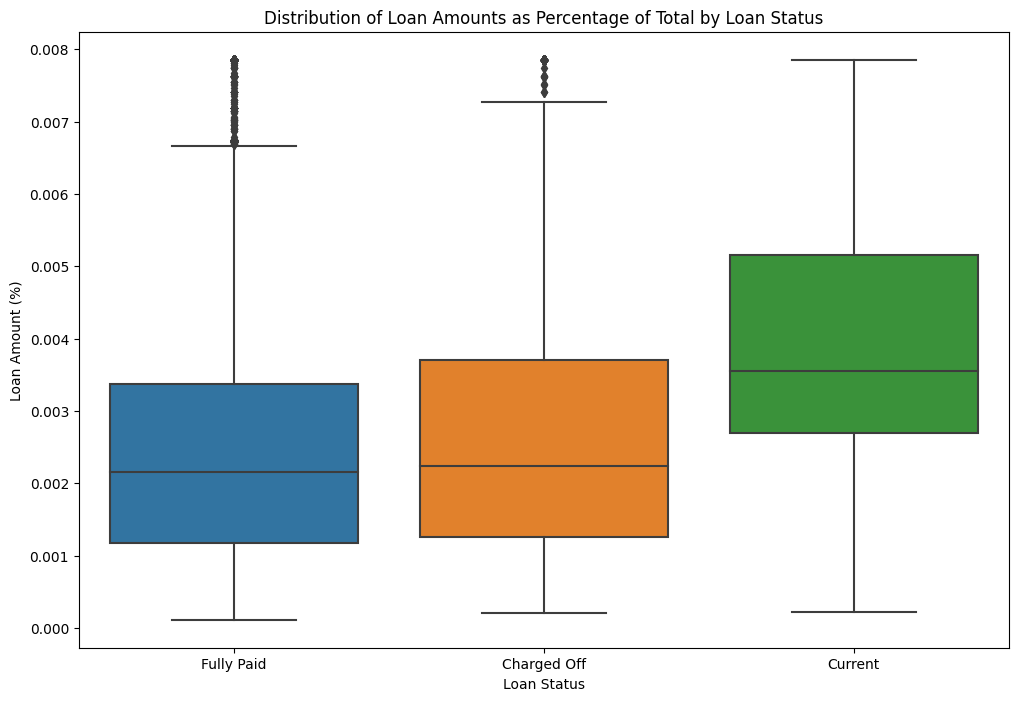

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, calculate the total loan amount to use for normalization
total_loan_amount = loan_df['loan_amnt'].sum()

# Now, create a new column that represents each loan as a percentage of the total loan amount
loan_df['loan_amnt_pct'] = (loan_df['loan_amnt'] / total_loan_amount) * 100

# Then, create a boxplot of the normalized loan amounts as percentages
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_amnt_pct', data=loan_df)
plt.title('Distribution of Loan Amounts as Percentage of Total by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount (%)')
plt.show


## Relationship between debt to income(dti) ratio and default percent

Higher the debt to income ratio, greater the chance to default.

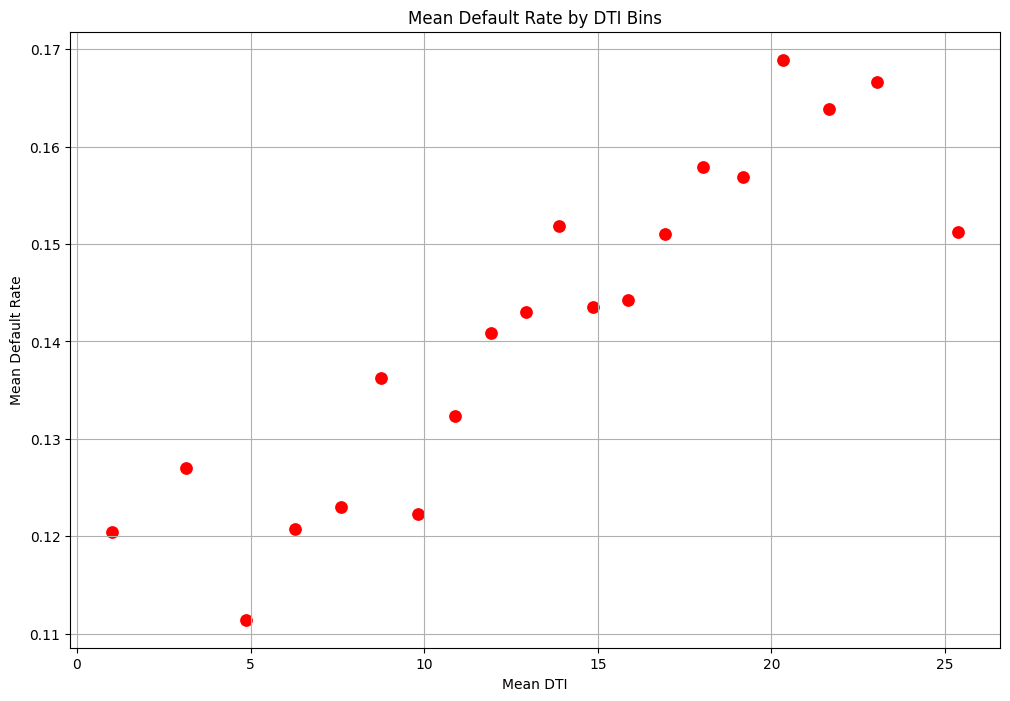

In [56]:
# Assuming 'loan_status' has a category for 'Charged Off' and 'loan_status_num' is 1 for 'Charged Off', 0 otherwise
loan_df['loan_status_num'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Bin the dti values into quantiles
loan_df['dti_bin'] = pd.qcut(loan_df['dti'], q=20)

# Group by the new dti_bin column and calculate the mean dti and default rate for each bin
grouped = loan_df.groupby('dti_bin').agg({'dti': 'mean', 'loan_status_num': 'mean'}).reset_index()

# Now create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='dti', y='loan_status_num', data=grouped, s=100, color='red')
plt.title('Mean Default Rate by DTI Bins')
plt.xlabel('Mean DTI')
plt.ylabel('Mean Default Rate')
plt.grid(True)
plt.show()


# Conclusions

Several factors have shown co-relation to significant default rates of customers.

**Purpose of Small Business:** Loans issued for the purpose of funding small businesses tend to have higher default rates, possibly due to the variable success rates and financial stability of small businesses.

**60-Month Term:** Loans with a 60-month term, particularly those originated in 2010-2011, show higher default rates compared to 36-month loans, which may reflect the higher financial burden over a longer period or economic conditions at the time of issuance.

**Higher Loan Amounts:** Larger loan amounts are associated with higher default rates, potentially due to the increased repayment burden on the borrower, which may become challenging to manage, especially if their financial circumstances change.

**Higher DTI:** Customers with a higher Debt-to-Income (DTI) ratio have higher default rates, likely because a higher DTI indicates a greater strain on borrowers' financial resources, reducing their ability to repay the loan.

**Low Income:**Lower-income customers exhibit higher default rates, suggesting that limited financial resources increase the challenge of meeting loan repayment obligations.

**Lower Credit Grades (E, F, G):** Customers with lower credit grades are associated with higher default rates, reflecting their lower creditworthiness and potentially higher risk of financial instability.

**Higher Interest Rates:**There is a correlation between higher interest rates and higher defaults, which could be due to the increased cost of borrowing leading to greater difficulty in managing repayments.

**State-Specific Default Rates:**Customers residing in Nebraska and Nevada experience higher default rates, hinting at regional economic factors or lending practices that may influence loan performance.

**Factors which do not influence default**

**Home Ownership and Earliest Credit Line Date:** No significant relationship was found between home ownership or the date of the earliest credit line and default rates, implying that these factors do not play a decisive role in predicting loan defaults in the dataset analyzed.

These conclusions point towards the multifaceted nature of loan defaults, influenced by a mix of personal financial indicators, loan terms, and broader economic factors. They underscore the importance of a comprehensive risk assessment that takes into account both individual borrower characteristics and wider economic trends.